# Basic visualisations on sample data

In [ ]:
import pandas as pd
df=pd.read_csv("/content/augdataevents (1).csv")
df

,Event name,userId,Event count,Total users,Event count per user,Total revenue
0,screen_view,(not set),7984,2253,3.734331,0
1,user_engagement,(not set),4272,1991,2.145655,0
2,session_start,(not set),2661,2252,1.245787,0
3,first_open,(not set),906,905,1.001105,0
4,notification_receive,(not set),696,11,63.272727,0
...,...,...,...,...,...,...
73944,whatsapp_customercall_button,9611420439,1,1,1.000000,0
73945,whatsapp_customercall_button,9714981166,1,1,1.000000,0
73946,whatsapp_customercall_button,9740777517,1,1,1.000000,0
73947,whatsapp_customercall_button,9921242486,1,1,1.000000,0


In [ ]:
# Check the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values and inconsistencies
print("\nInformation about the dataset:")
print(df.info())

# Summary statistics for numerical variables
print("\nSummary statistics:")
print(df.describe())

First few rows of the dataset:
             Event name     userId  Event count  Total users  \
0           screen_view  (not set)         7984         2253   
1       user_engagement  (not set)         4272         1991   
2         session_start  (not set)         2661         2252   
3            first_open  (not set)          906          905   
4  notification_receive  (not set)          696           11   

   Event count per user  Total revenue  
0              3.734331              0  
1              2.145655              0  
2              1.245787              0  
3              1.001105              0  
4             63.272727              0  

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73949 entries, 0 to 73948
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Event name            73949 non-null  object 
 1   userId                73949 non-null  ob

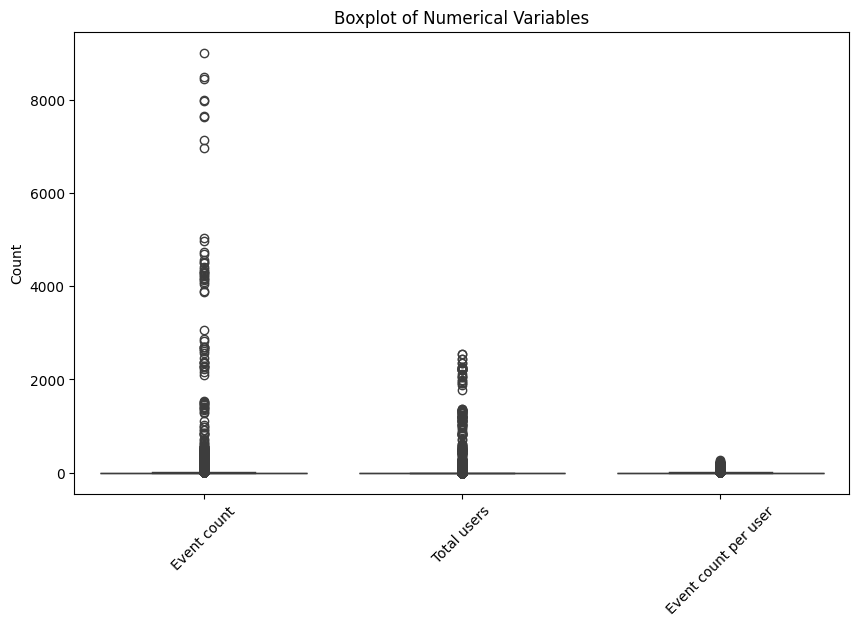

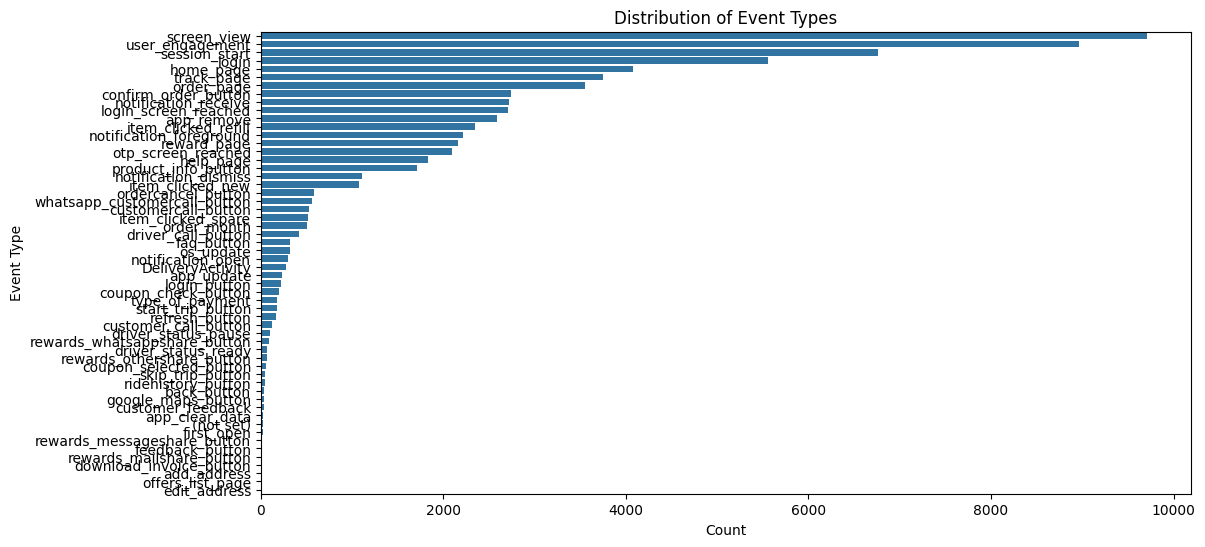

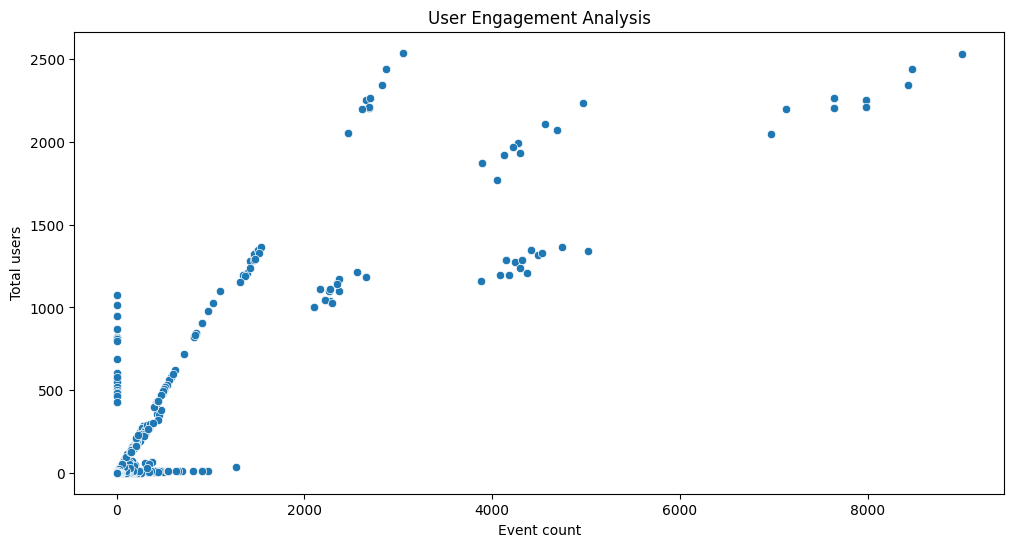

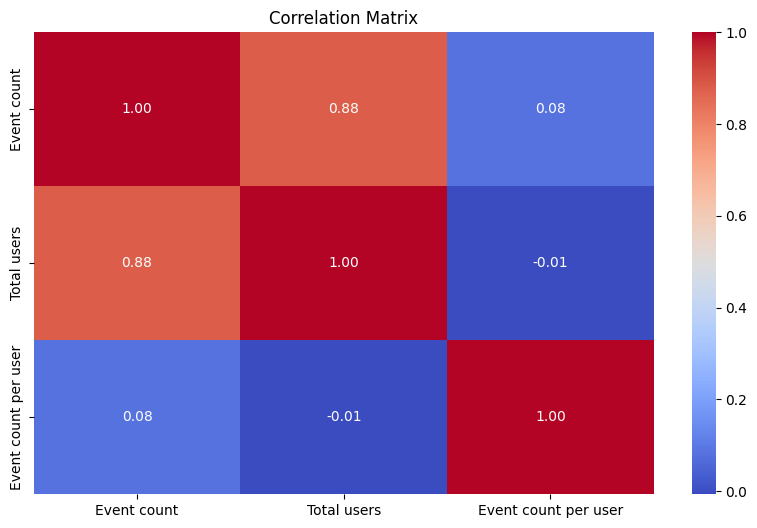

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data=df
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Event count', 'Total users', 'Event count per user']])
plt.title('Boxplot of Numerical Variables')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analysis by Event Type
# Visualize the distribution of different event types
plt.figure(figsize=(12, 6))
sns.countplot(y='Event name', data=data, order=data['Event name'].value_counts().index)
plt.title('Distribution of Event Types')
plt.xlabel('Count')
plt.ylabel('Event Type')
plt.show()

# User Behavior Analysis
# Identify events with high user engagement or low user engagement
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Event count', y='Total users', data=data)
plt.title('User Engagement Analysis')
plt.xlabel('Event count')
plt.ylabel('Total users')
plt.show()

# Correlation Analysis (for numerical variables only)
correlation_matrix = data[['Event count', 'Total users', 'Event count per user']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
screen_views = data[data['Event name'] == 'screen_view']

# Calculate total screen views and unique users for each landing page
landing_page_stats = screen_views.groupby('userId').agg({'Event count': 'sum', 'Total users': 'nunique'}).reset_index()

# Calculate conversion rate for each landing page
landing_page_stats['Conversion Rate'] = landing_page_stats['Total users'] / landing_page_stats['Event count']

# Sort the landing pages by conversion rate in descending order
top_landing_pages = landing_page_stats.sort_values(by='Conversion Rate', ascending=False).head(3)

print(top_landing_pages[['userId', 'Conversion Rate']])

          userId  Conversion Rate
3087  9021195990              1.0
4035  9534117243              1.0
3759  9433445585              1.0


In [ ]:
correlation = data['Total users'].corr(data['Event count'])

print("Correlation coefficient between Total users and Event count:", correlation)

Correlation coefficient between Total users and Event count: 0.8805594171518735


In [ ]:
landing_page_users = data.groupby('Event name')['Total users'].sum()

# Find the landing page with the maximum number of users
landing_page_max_users = landing_page_users.idxmax()

# Find the maximum number of users
max_users = landing_page_users.max()

print("Landing page with maximum users:", landing_page_max_users)
print("Number of users:", max_users)

Landing page with maximum users: screen_view
Number of users: 46873


User Behavior Metrics:
                  Event count  Total users
Engagement Level                          
Low                  1.343691     1.343691
Medium              14.817186     6.830385
High                18.569195     1.103987

Landing Pages with Highest Conversions:
Event name
screen_view                     226510
user_engagement                 114338
session_start                    54716
notification_receive             26119
notification_dismiss             16005
first_open                       14794
home_page                        12414
login_screen_reached             12279
DeliveryActivity                 11264
track_page                       10295
app_remove                        9719
order_page                        6968
otp_screen_reached                6911
help_page                         6527
login                             5764
product_info_button               5581
confirm_order_button              4767
refresh_button                    4665
item_cli

<ipython-input-16-67f26c45451e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=landing_page_conversions.values, y=landing_page_conversions.index, palette='viridis')


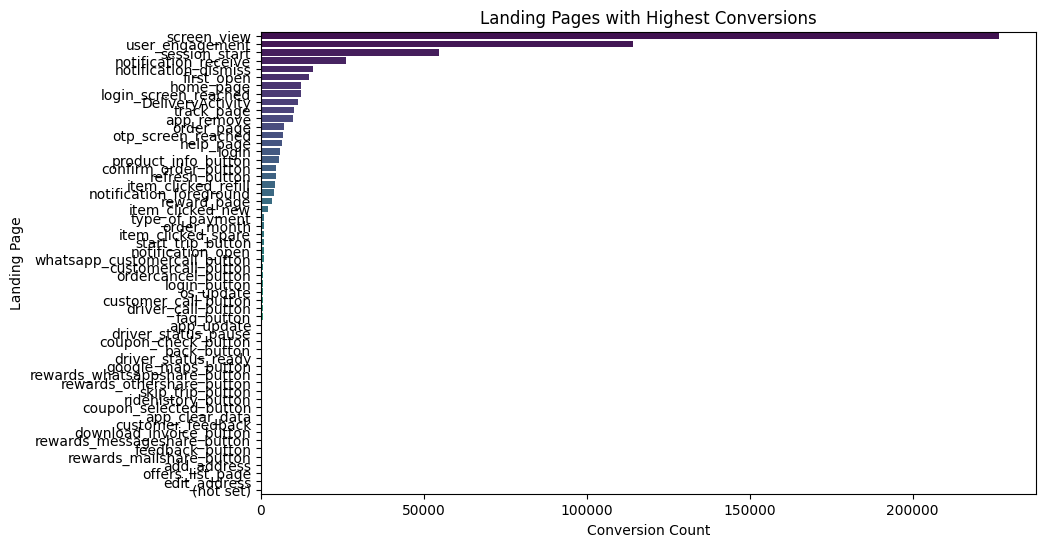

In [ ]:
def segment_users(df):
    # Define criteria for segmentation (e.g., frequency of app usage, time spent)
    # Segment users into high, medium, and low engagement levels based on these criteria
    # You can use pandas' cut function or custom logic to create engagement segments
    # Example:
    df['Engagement Level'] = pd.cut(df['Event count per user'], bins=[0, 1, 5, float('inf')], labels=['Low', 'Medium', 'High'])
    return df

# Analyze user behavior for each segment
def analyze_user_behavior(df):
    # Group data by engagement level and analyze user behavior metrics (e.g., screen views, actions taken)
    behavior_metrics = df.groupby('Engagement Level').agg({'Event count': 'mean', 'Total users': 'mean'})
    return behavior_metrics

# Tailor features or notifications for different user segments
def tailor_strategies(df):
    if 'High' in df['Engagement Level']:
        # Implement strategy for high-engagement users
        pass
    # Repeat for other engagement levels

# Analyze conversion data and identify landing pages with the highest number of conversions
def analyze_conversion_data(df):
    # Group data by landing page and calculate total conversions
    landing_page_conversions = df.groupby('Event name')['Event count'].sum()
    # Sort landing pages by conversion count in descending order
    landing_page_conversions = landing_page_conversions.sort_values(ascending=False)
    return landing_page_conversions

# Visualize landing pages with the highest number of conversions
def visualize_conversions(landing_page_conversions):
    # Create a bar plot to visualize landing pages and their conversion counts
    plt.figure(figsize=(10, 6))
    sns.barplot(x=landing_page_conversions.values, y=landing_page_conversions.index, palette='viridis')
    plt.xlabel('Conversion Count')
    plt.ylabel('Landing Page')
    plt.title('Landing Pages with Highest Conversions')
    plt.show()

# Main function to orchestrate the analysis process
def main():
    # Segment users based on engagement levels
    segmented_data = segment_users(data)

    # Analyze user behavior for each segment
    behavior_metrics = analyze_user_behavior(segmented_data)
    print("User Behavior Metrics:")
    print(behavior_metrics)

    # Tailor features or notifications for different user segments
    tailored_strategies = tailor_strategies(segmented_data)

    # Analyze conversion data and identify landing pages with the highest number of conversions
    landing_page_conversions = analyze_conversion_data(data)
    print("\nLanding Pages with Highest Conversions:")
    print(landing_page_conversions)

    # Visualize landing pages with the highest number of conversions
    visualize_conversions(landing_page_conversions)

if __name__ == "__main__":
    main()

# K_MEANS CLUSTERING

> Add blockquote



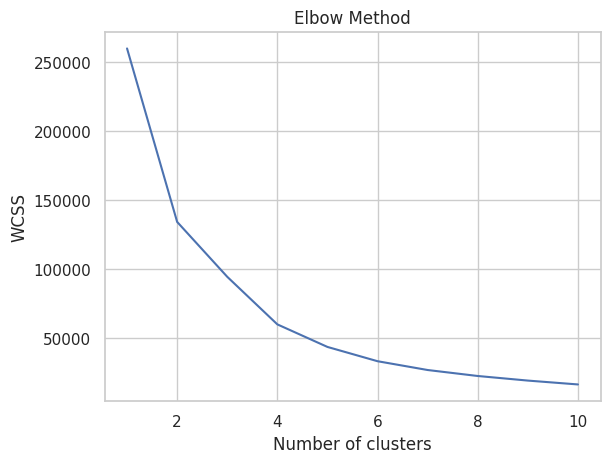

Cluster Centers:
         Views        Users  Views per user  Average engagement time  \
0     2.553305     1.245405        2.156459                37.563189   
1  4729.545455  2976.181818        1.588889                13.917655   
2   162.777778     1.444444      157.133333             10783.577778   
3  1852.181818  1451.606061        1.264498                19.528417   

    Event count  Conversions  
0      6.710134     0.109940  
1  14556.181818  1305.181818  
2    739.055556     0.222222  
3   3383.121212    13.272727  

Clustered Data:
      Page title and screen name      userId  Views  Users  Views per user  \
0                      (not set)   (not set)   5032   3156        1.594423   
1                              /   (not set)   3007   2227        1.350247   
2               /DashboardScreen   (not set)   1622   1180        1.374576   
3              /OnboardingScreen   (not set)   1432   1352        1.059172   
4                   /LoginScreen   (not set)    745    539  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data from CSV
data = pd.read_csv("/content/augdata (1) [MConverter.eu].csv")

# Select relevant columns for clustering
X = data[["Views","Users","Views per user","Average engagement time","Event count","Conversions"]]
data.drop(["Total revenue","userId"],axis=1)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters (e.g., 3 based on the Elbow method)
n_clusters = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42,n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Output cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=X.columns)
print("Cluster Centers:")
print(cluster_centers_df)

# Output clustered data
print("\nClustered Data:")
print(data)


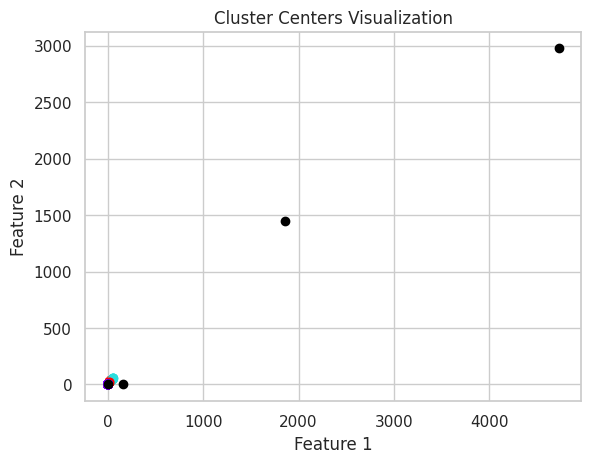

In [ ]:
# Plotting the data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='rainbow')  # Adjust X_scaled[:, 0] and X_scaled[:, 1] accordingly
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black')  # Plotting cluster centers
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cluster Centers Visualization')
plt.show()


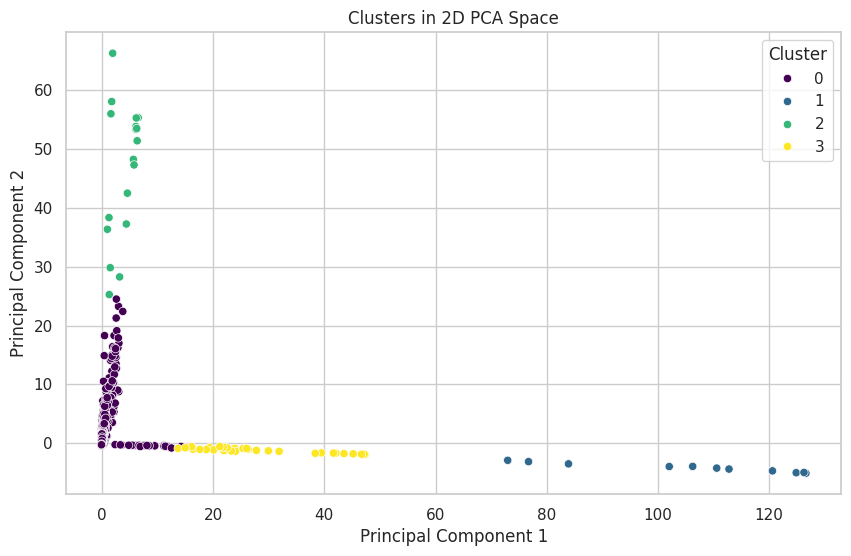

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Choose the optimal number of clusters (e.g., 3 based on the Elbow method)
n_clusters = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42,n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Plot clusters in 2D PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', legend='full')
plt.title('Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


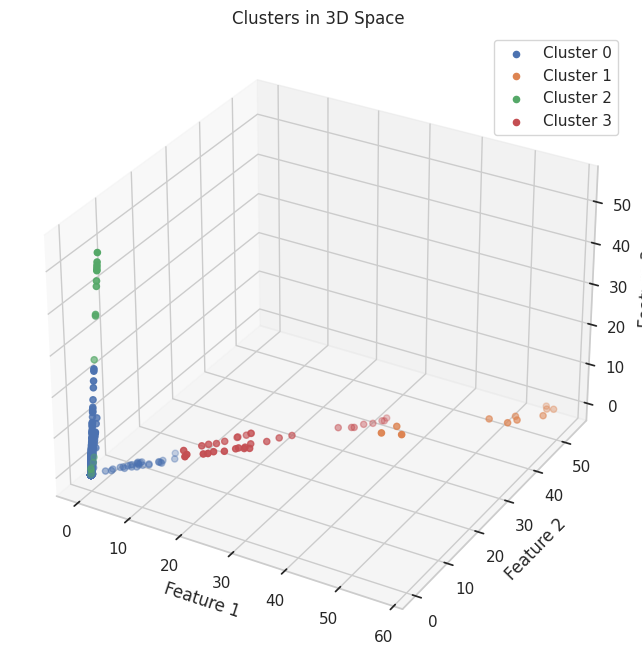

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

# Choose the optimal number of clusters (e.g., 3 based on the Elbow method)
n_clusters = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42,n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(n_clusters):
    ax.scatter(X_scaled[clusters == cluster, 0], X_scaled[clusters == cluster, 1], X_scaled[clusters == cluster, 2], label=f'Cluster {cluster}')

ax.set_title('Clusters in 3D Space')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.legend()
plt.show()


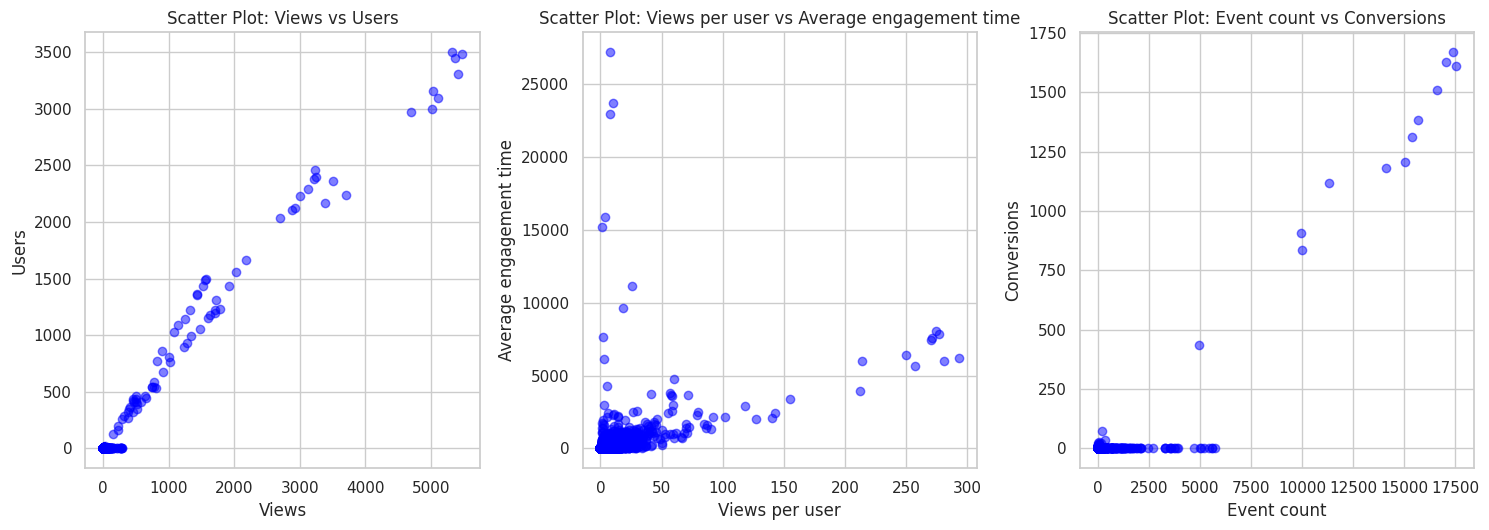

In [ ]:

plt.figure(figsize=(15, 10))

# Define pairs of features for scatter plots
feature_pairs = [("Views", "Users"), ("Views per user", "Average engagement time"), ("Event count", "Conversions")]

# Create scatter plots for each pair of features
for i, pair in enumerate(feature_pairs, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data[pair[0]], data[pair[1]], c='blue', alpha=0.5)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f"Scatter Plot: {pair[0]} vs {pair[1]}")

plt.tight_layout()
plt.show()


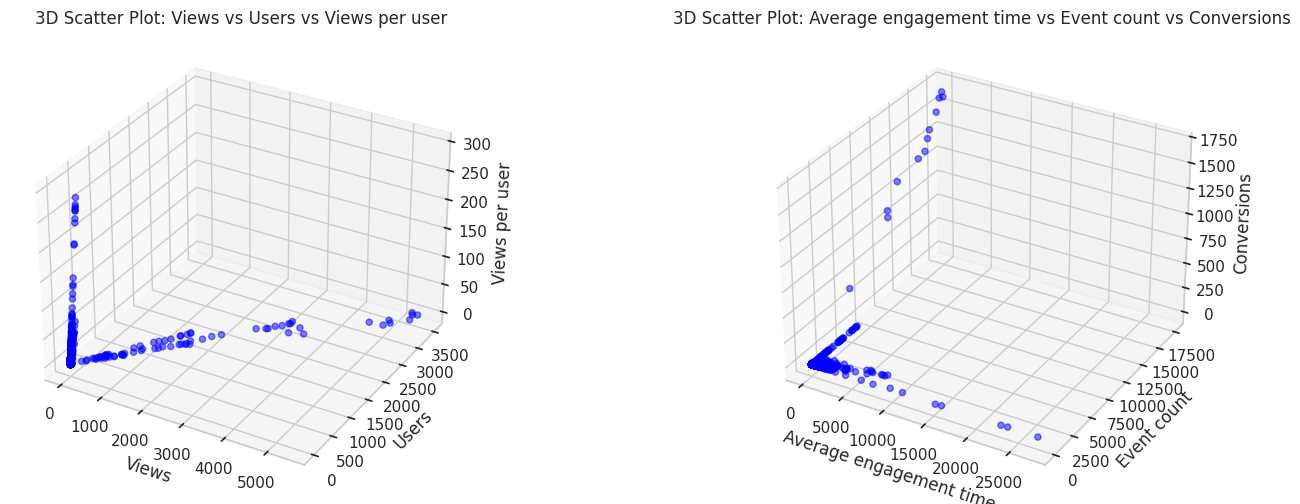

In [ ]:

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(15, 10))

# Define triplets of features for 3D scatter plots
feature_triplets = [("Views", "Users", "Views per user"),
                    ("Average engagement time", "Event count", "Conversions")]

# Create 3D scatter plots for each triplet of features
for i, triplet in enumerate(feature_triplets, 1):
    ax = plt.subplot(2, 2, i, projection='3d')
    ax.scatter(data[triplet[0]], data[triplet[1]], data[triplet[2]], c='blue', alpha=0.5)
    ax.set_xlabel(triplet[0])
    ax.set_ylabel(triplet[1])
    ax.set_zlabel(triplet[2])
    ax.set_title(f"3D Scatter Plot: {triplet[0]} vs {triplet[1]} vs {triplet[2]}")

plt.tight_layout()
plt.show()


In [ ]:
cluster_sizes = data['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_sizes)


Cluster Sizes:
Cluster
0    43251
3       33
2       18
1       11
Name: count, dtype: int64


Index(['Page title and screen name', 'userId', 'Views', 'Users',
       'Views per user', 'Average engagement time', 'Event count',
       'Conversions', 'Total revenue'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

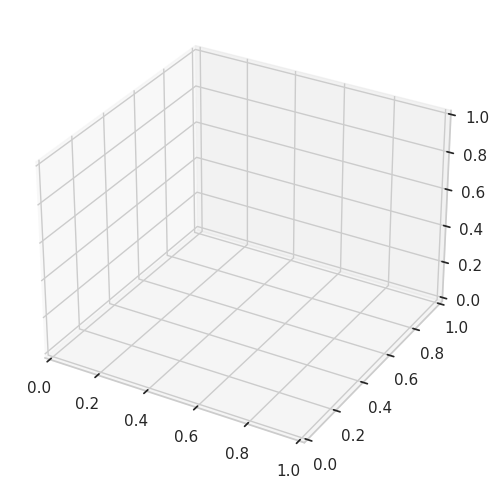

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv("/content/augdata (1) [MConverter.eu].csv")
print(data.columns)

# Select relevant features for clustering
X = data[['Event count', 'Users', 'Views per user']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
k = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
y_dummy = np.zeros(X_scaled.shape[0])

# Oversample using SMOTE to address imbalance
smote = SMOTE()
X_resampled, _ = smote.fit_resample(X_scaled, y_dummy)
# Apply k-means clustering on the resampled data
kmeans_resampled = KMeans(n_clusters=k, random_state=42)
clusters_resampled = kmeans_resampled.fit_predict(X_resampled)

# Visualize clusters in 3D
fig_resampled = plt.figure(figsize=(8, 6))
ax_resampled = fig_resampled.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']  # Add more colors if needed
for i in range(k):
    ax.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1], X_scaled[clusters == i, 2], c=colors[i], label=f'Cluster {i}')

ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='black', marker='*', label='Centroids')
ax.set_xlabel('Event count')
ax.set_ylabel('Users')
ax.set_zlabel('Views per user')
plt.title('K-means Clustering')
plt.legend()
plt.show()
# Calculate the size of each cluster
cluster_sizes = [np.sum(clusters_resampled == i) for i in range(k)]
print("Cluster sizes:", cluster_sizes)

# Calculate the centroids
centroids_resampled = kmeans_resampled.cluster_centers_
print("Centroids:")
for i, centroid in enumerate(centroids_resampled):
    print(f"Cluster {i} centroid:", centroid)


In [ ]:
pip install balanced-kmeans

  Preparing metadata (setup.py) ... done
  Created wheel for balanced-kmeans: filename=balanced_kmeans-0.1.0-py3-none-any.whl size=5162 sha256=ad085767417119bdfb5a22d7854731402e88629f8cf12488385c6c791d95786c
  Stored in directory: /root/.cache/pip/wheels/b4/48/65/a9f37007350003d058639336b0780d7ac1665d1f07eec2c0b4
Successfully built balanced-kmeans


In [ ]:
import pandas as pd
from balanced_kmeans import BalancedKMeans

df=data
# Convert categorical variables to numerical variables
df["page_title"] = pd.Categorical(df["page_title"]).codes
df["screen_name"] = pd.Categorical(df["screen_name"]).codes

# Apply the Balanced k-Means algorithm
X = df[["page_title", "screen_name"]].values
k = 3  # number of clusters

bkm = BalancedKMeans(k=k, max_diff_clusters_sizes=10, max_iter=100, init="forgy")
bkm.fit(X)

# Get the cluster labels
labels = bkm.labels_

# Print the results
for i in range(len(df)):
    print(f"{df.iloc[i]['page_title']}, {df.iloc[i]['screen_name']}, {labels[i]}")

ImportError: cannot import name 'BalancedKMeans' from 'balanced_kmeans' (/usr/local/lib/python3.10/dist-packages/balanced_kmeans/__init__.py)

In [ ]:
pip install scikit-learn matplotlib pandas seaborn numpy

In [ ]:
# Modules
import sklearn.datasets
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('/content/augdata (1) [MConverter.eu].csv')

#


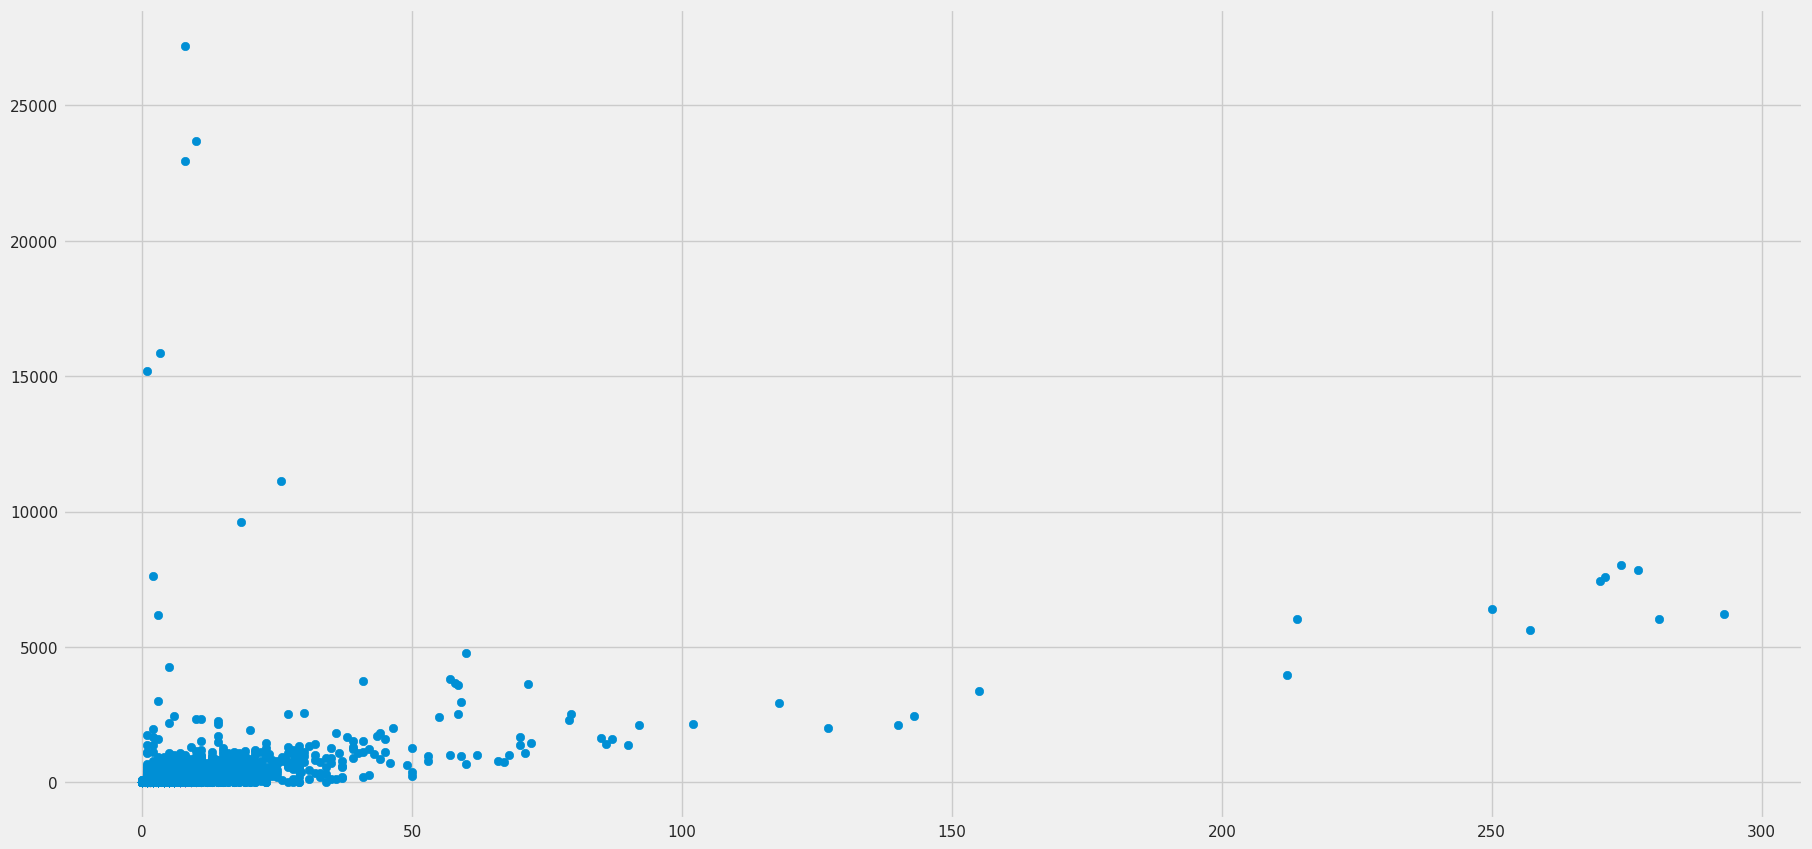

In [ ]:
#Plot the data
plt.figure(figsize=(20, 10))
plt.scatter(df.iloc[:, 4],df.iloc[:, 5])

In [ ]:
df=df[['Views per user','Average engagement time']]

In [ ]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))

    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

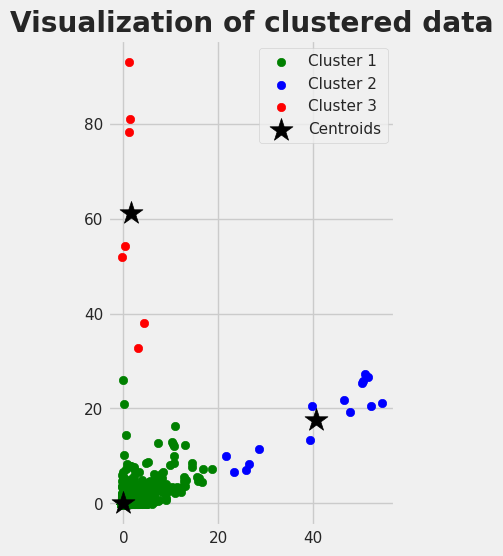

Cluster Sizes:
0    43291
1       15
2        7
Name: count, dtype: int64


In [ ]:
X_std = StandardScaler().fit_transform(df)

# Run local implementation of kmeans
km = KMeans(n_clusters=3, max_iter=100)  # Change the number of clusters to 3
km.fit(X_std)
centroids = km.cluster_centers_

# Plot the clustered data
fig, ax = plt.subplots(figsize=(5, 6))
plt.scatter(X_std[km.labels_ == 0, 0], X_std[km.labels_ == 0, 1],
            c='green', label='Cluster 1')
plt.scatter(X_std[km.labels_ == 1, 0], X_std[km.labels_ == 1, 1],
            c='blue', label='Cluster 2')
plt.scatter(X_std[km.labels_ == 2, 0], X_std[km.labels_ == 2, 1],
            c='red', label='Cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='black', label='Centroids')
plt.legend()
plt.title('Visualization of clustered data', fontweight='bold')
ax.set_aspect('equal')
plt.show()
# Calculate cluster sizes
cluster_sizes = pd.Series(km.labels_).value_counts().sort_index()
print("Cluster Sizes:")
print(cluster_sizes)


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority clusters
X_resampled, y_resampled = smote.fit_resample(X_std, km.labels_)

# Print the sizes of the resampled clusters
resampled_cluster_sizes = pd.Series(y_resampled).value_counts().sort_index()
print("Resampled Cluster Sizes:")
print(resampled_cluster_sizes)


Resampled Cluster Sizes:
0    43291
1    43291
2    43291
Name: count, dtype: int64


In [ ]:
data.head(30)
df=data[data['Cluster'] == 0]
df.head(50)

,Page title and screen name,userId,Views,Users,Views per user,Average engagement time,Event count,Conversions,Total revenue,Cluster
4,/LoginScreen,(not set),745,539,1.382189,75.447124,1548,0,0,0
5,/OtpScreen,(not set),496,440,1.127273,31.584091,1142,0,0,0
7,(not set),7676790148,159,2,79.500000,2514.500000,728,0,0,0
8,(not set),9980478268,127,1,127.000000,2003.000000,531,0,0,0
9,(not set),9686210049,92,1,92.000000,2133.000000,976,0,0,0
11,(not set),9148845099,70,1,70.000000,1393.000000,495,0,0,0
12,(not set),9740427320,57,1,57.000000,3823.000000,552,0,0,0
13,(not set),9945949485,52,2,26.000000,929.000000,318,0,0,0
14,(not set),7022710152,47,2,23.500000,1052.500000,888,0,0,0
15,/DashboardScreen,9964158063,39,1,39.000000,1519.000000,157,2,0,0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/augdata (1) [MConverter.eu].csv")
df.head()


,Page title and screen name,userId,Views,Users,Views per user,Average engagement time,Event count,Conversions,Total revenue
0,(not set),(not set),5032,3156,1.594423,13.803232,15682,1385,0
1,/,(not set),3007,2227,1.350247,7.896722,5186,0,0
2,/DashboardScreen,(not set),1622,1180,1.374576,41.330508,3954,0,0
3,/OnboardingScreen,(not set),1432,1352,1.059172,14.251479,1946,0,0
4,/LoginScreen,(not set),745,539,1.382189,75.447124,1548,0,0


In [ ]:
print(df.shape)
print(df.describe())
print(df.dtypes)

(43313, 9)
              Views         Users  Views per user  Average engagement time  \
count  43313.000000  43313.000000    43313.000000             43313.000000   
mean       5.229608      3.106042        2.220041                42.009268   
std       95.197179     64.957602        5.333862               291.999815   
min        0.000000      0.000000        0.000000                 0.000000   
25%        1.000000      1.000000        1.000000                 1.000000   
50%        1.000000      1.000000        1.000000                 6.000000   
75%        2.000000      1.000000        2.000000                24.000000   
max     5472.000000   3501.000000      293.000000             27191.000000   

        Event count   Conversions  Total revenue  
count  43313.000000  43313.000000        43313.0  
mean      13.282017      0.451458            0.0  
std      260.127240     21.358855            0.0  
min        1.000000      0.000000            0.0  
25%        1.000000      0.0000

In [ ]:
df.isnull().sum()

Page title and screen name    0
userId                        0
Views                         0
Users                         0
Views per user                0
Average engagement time       0
Event count                   0
Conversions                   0
Total revenue                 0
dtype: int64

In [ ]:
df.drop(["Total revenue","userId"],axis=1)

,Page title and screen name,Views,Users,Views per user,Average engagement time,Event count,Conversions
0,(not set),5032,3156,1.594423,13.803232,15682,1385
1,/,3007,2227,1.350247,7.896722,5186,0
2,/DashboardScreen,1622,1180,1.374576,41.330508,3954,0
3,/OnboardingScreen,1432,1352,1.059172,14.251479,1946,0
4,/LoginScreen,745,539,1.382189,75.447124,1548,0
...,...,...,...,...,...,...,...
43308,(not set),1,1,1.000000,1.000000,2,0
43309,(not set),0,0,0.000000,0.000000,2,0
43310,(not set),1,1,1.000000,1.000000,2,0
43311,(not set),1,1,1.000000,0.000000,2,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert non-numeric values to NaN
df_cleaned[x] = pd.to_numeric(df_cleaned[x], errors='coerce')

plt.figure(1, figsize=(15, 6))
for i, x in enumerate(["Views", "Users", "Views per user", "Average engagement time", "Event count", "Conversions"]):
    if i >= 5:
        break  # Exit the loop if more than 3 columns processed
    plt.subplot(1, 5, i+1)  # Use i+1 as subplot index starts from 1
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(df_cleaned[x], bins=20)
plt.show()


KeyError: (5, 'Event count')

<function matplotlib.pyplot.show(close=None, block=None)>

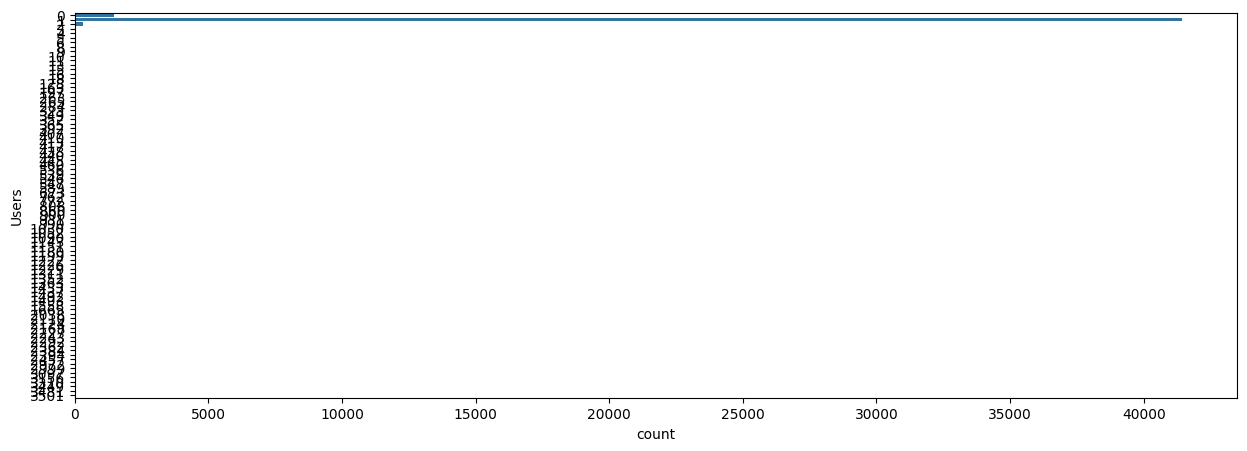

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Users',data=df)
plt.show

ValueError: num must be an integer with 1 <= num <= 5, not 6

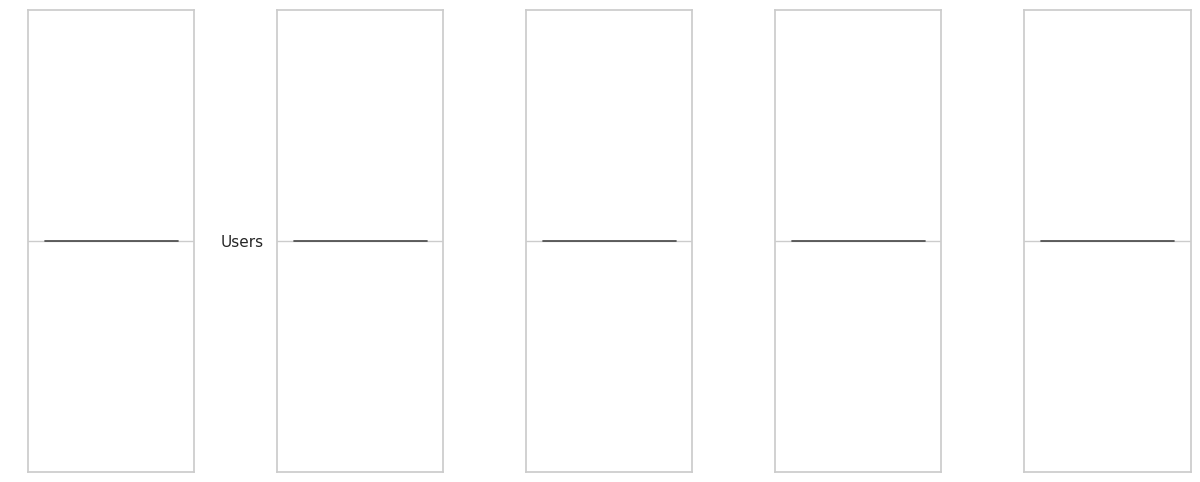

In [ ]:
plt.figure(1, figsize=(15, 6))
i=1
for x in enumerate(["", "Views", "Users", "Views per user", "Average engagement time", "Event count", "Conversions"]):
  i+=1
  # Exit the loop if more than 3 columns processed
  plt.subplot(1, 5, i-1)
  sns.set(style= "whitegrid")# Use i+1 as subplot index starts from 1
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot("Users" if i==3 else " ")
plt.show()